In [3]:
import numpy as np
import pandas as pd
from data_loader import (
    get_index_tickers, 
    download_returns, 
    get_all_datasets,
    DATASETS

)
from optimization import run_optimization
from visualization import (
    generate_comparison_table, 
    print_latex_table, 
    print_summary,
    plot_comparison_bar_chart,
    plot_heatmap_2d,
    plot_heatmap_3d_slices,
    generate_paper_tables
)


# Configuration
CONFIG = {
    # Data settings
    'num_stocks': 100,
    'random_sample': True,
    'random_seed': 42,
    'start_date': '2020-01-01',
    'end_date': None,
    
    # Optimization settings
    'N_train': 200,
    'grid_size': 11,
    
    # Paper replication: run all datasets and frequencies
    'datasets': ['sp500', 'nasdaq100', 'nikkei225', 'nifty50', 'bse_sensex', 'ftse100'],
    'frequencies': [30, 60, 90],  # Rebalancing frequencies (days)
}

# Display names for datasets
DATASET_DISPLAY_NAMES = {
    'sp500': 'S&P',
    'nasdaq100': 'NASDAQ',
    'nikkei225': 'NIKKEI',
    'nifty50': 'NSE',
    'bse_sensex': 'BSE',
    'ftse100': 'FTSE',
}


def run_single_experiment(returns, dataset_name, frequency, grid_size=11, N_train=200):
    """Run optimization for a single dataset and frequency."""
    results = run_optimization(
        returns,
        N_train=N_train,
        N_test=frequency,
        rebalance_freq=frequency,
        grid_size=grid_size,
        verbose=False
    )
    return results


def run_paper_replication(config):
    """
    Run full paper replication: all datasets × all frequencies.
    
    Returns:
        all_results: Dict of {(dataset, freq): results}
    """
    print("\n" + "="*70)
    print("PAPER REPLICATION: Running all datasets and frequencies")
    print("="*70)
    print(f"Datasets: {config['datasets']}")
    print(f"Frequencies: {config['frequencies']} days")
    print("="*70 + "\n")
    
    all_results = {}
    
    for dataset in config['datasets']:
        print(f"\n{'='*50}")
        print(f"Loading {DATASET_DISPLAY_NAMES.get(dataset, dataset)} data...")
        print(f"{'='*50}")
        
        try:
            # Get tickers for this dataset
            tickers = get_index_tickers(
                dataset,
                num_stocks=config['num_stocks'],
                random_sample=config['random_sample'],
                seed=config['random_seed']
            )
            
            # Download returns
            returns = download_returns(
                tickers,
                start_date=config['start_date'],
                end_date=config['end_date'],
                verbose=True
            )
            
            if len(returns) == 0 or len(returns.columns) < 10:
                print(f"  Insufficient data for {dataset}, skipping...")
                continue
                
            print(f"  Dataset: {len(returns.columns)} assets, {len(returns)} trading days")
            
            # Run for each frequency
            for freq in config['frequencies']:
                print(f"\n  Running {freq}-day rebalancing...")
                
                results = run_single_experiment(
                    returns, 
                    dataset, 
                    freq, 
                    grid_size=config['grid_size'],
                    N_train=config['N_train']
                )
                
                all_results[(dataset, freq)] = results
                
                # Quick summary
                if results.get('our_3d_method', {}).get('avg_variance') is not None:
                    vol = np.sqrt(results['our_3d_method']['avg_variance'] * 252) * 100
                    print(f"    Our 3D: {vol:.3f}%")
                    
        except Exception as e:
            print(f"  Error processing {dataset}: {e}")
            import traceback
            traceback.print_exc()
            continue
    
    return all_results


config = CONFIG
    
# Run paper replication
all_results = run_paper_replication(config)



PAPER REPLICATION: Running all datasets and frequencies
Datasets: ['sp500', 'nasdaq100', 'nikkei225', 'nifty50', 'bse_sensex', 'ftse100']
Frequencies: [30, 60, 90] days


Loading S&P data...


[*********************100%***********************]  100 of 100 completed

Successfully loaded: 89 assets, 1498 days
Returns shape: (1497, 89)
Date range: 2020-01-03 00:00:00 to 2025-12-16 00:00:00
  Dataset: 89 assets, 1497 trading days

  Running 30-day rebalancing...


    Our 3D: 12.588%

  Running 60-day rebalancing...
    Our 3D: 12.851%

  Running 90-day rebalancing...
    Our 3D: 12.957%

Loading NASDAQ data...


[*********************100%***********************]  100 of 100 completed

Successfully loaded: 86 assets, 1498 days
Returns shape: (1497, 86)
Date range: 2020-01-03 00:00:00 to 2025-12-16 00:00:00
  Dataset: 86 assets, 1497 trading days

  Running 30-day rebalancing...


    Our 3D: 12.395%

  Running 60-day rebalancing...
    Our 3D: 12.823%

  Running 90-day rebalancing...
    Our 3D: 12.894%

Loading NIKKEI data...


[**********************45%                       ]  45 of 99 completedHTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 9613.T"}}}
[*********************100%***********************]  99 of 99 completed

2 Failed downloads:
['9613.T']: YFTzMissingError('possibly delisted; no timezone found')
['9062.T']: ConnectionError('Failed to perform, curl: (7) Failed to connect to query1.finance.yahoo.com port 443 after 2001 ms: Could not connect to server. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Successfully loaded: 96 assets, 1455 days
Returns shape: (1454, 96)
Date range: 2020-01-07 00:00:00 to 2025-12-16 00:00:00
  Dataset: 96 assets, 1454 trading days

  Running 30-day rebalancing...
    Our 3D: 13.531%

  Running 60-day rebalancing...
    Our 3D: 13.718%

  Running 90-day rebalancing...
    Our 3D: 13.837%

Loading NSE data...


[*********************100%***********************]  50 of 50 completed

Successfully loaded: 50 assets, 1478 days
Returns shape: (1477, 50)
Date range: 2020-01-02 00:00:00 to 2025-12-16 00:00:00
  Dataset: 50 assets, 1477 trading days

  Running 30-day rebalancing...


    Our 3D: 11.291%

  Running 60-day rebalancing...
    Our 3D: 11.430%

  Running 90-day rebalancing...
    Our 3D: 11.570%

Loading BSE data...


[*********************100%***********************]  30 of 30 completed


Successfully loaded: 4 assets, 1477 days
Returns shape: (1476, 4)
Date range: 2020-01-02 00:00:00 to 2025-12-16 00:00:00
  Insufficient data for bse_sensex, skipping...

Loading FTSE data...


[*********************100%***********************]  98 of 98 completed

8 Failed downloads:
['BDEV.L', 'POLY.L', 'MGGT.L', 'DARK.L', 'SMDS.L', 'ICP.L', 'AVV.L', 'VMUK.L']: YFTzMissingError('possibly delisted; no timezone found')


Successfully loaded: 77 assets, 1506 days
Returns shape: (1505, 77)
Date range: 2020-01-03 00:00:00 to 2025-12-16 00:00:00
  Dataset: 77 assets, 1505 trading days

  Running 30-day rebalancing...
    Our 3D: 8.032%

  Running 60-day rebalancing...
    Our 3D: 8.370%

  Running 90-day rebalancing...
    Our 3D: 8.832%


In [7]:
# Generate paper-style tables
print("\n" + "="*70)
print("RESULTS TABLES (Paper Format)")
print("="*70)
    
generate_paper_tables(all_results, config['frequencies'])
    
# Generate detailed results for each dataset/frequency
for (dataset, freq), results in all_results.items():
    print(f"\n{'='*70}")
    print(f"Detailed Results: {DATASET_DISPLAY_NAMES.get(dataset, dataset)} - {freq} days")
    print(f"{'='*70}")
    
    table = generate_comparison_table(results)
    print(table.to_string(index=False))


RESULTS TABLES (Paper Format)

TABLE I: Annualized Volatility (%) - NSE, NIKKEI, S&P
    Estimator NSE (30d) NIKKEI (30d) S&P (30d) NSE (60d) NIKKEI (60d) S&P (60d) NSE (90d) NIKKEI (90d) S&P (90d)
   Σ_Identity     13.92        18.92     16.82     13.99        19.05     16.98     14.08        19.22     17.04
     Σ_Scaled     13.92        18.92     16.82     13.99        19.05     16.98     14.08        19.22     17.04
        Σ_SCM     11.50        13.60     12.99     11.73        13.84     13.15     11.87        14.01     13.36
     Σ_Target     12.39        17.80     15.74     12.48        17.68     15.65     12.55        18.17     15.78
         Σ_MP     11.44        13.78     12.97     11.62        13.97     13.18     11.71        14.11     13.53
      Σ_Tyler     11.43        13.65     12.65     11.59        13.88     12.95     11.72        13.98     13.01
Σ* (Paper 2D)     11.36        13.57     12.83     11.49        13.75     13.04     11.62        13.87     13.30
  Σ* (Our 

In [5]:
import matplotlib.pyplot as plt

# Dictionary to store all outputs
outputs = {
    'tables': {},
    'plots': {},
    'summary': {}
}

print("\n" + "="*70)
print("GENERATING ALL VISUALIZATIONS (CORRECTED)")
print("="*70)

# Generate visualizations for ALL dataset/frequency combinations (not just first)
for (dataset, freq), results in all_results.items():
    print(f"\n{'='*50}")
    print(f"Visualizing: {DATASET_DISPLAY_NAMES.get(dataset, dataset)} - {freq} days")
    print(f"{'='*50}")
    
    # Generate comparison table
    table = generate_comparison_table(results)
    outputs['tables'][(dataset, freq)] = table
    
    # 1. Bar chart comparison
    print("  Generating bar chart...")
    plt.figure(figsize=(12, 6))
    plot_comparison_bar_chart(table, save_path=f'comparison_{dataset}_{freq}d.png')
    plt.show()
    print(f"    ✓ Saved: comparison_{dataset}_{freq}d.png")
    
    # 2. 2D heatmap - FIXED: use 'dual_method_2d' not 'paper_2d'
    if results.get('dual_method_2d', {}).get('avg_performance') is not None:
        print("  Generating 2D heatmap...")
        plt.figure(figsize=(10, 8))
        plot_heatmap_2d(results, save_path=f'heatmap_2d_{dataset}_{freq}d.png')
        plt.show()
        print(f"    ✓ Saved: heatmap_2d_{dataset}_{freq}d.png")
    else:
        print("  ⚠ Skipping 2D heatmap (no avg_performance data)")
    
    # 3. 3D heatmap slices - FIXED: use 'our_3d_method' not 'our_3d'
    if results.get('our_3d_method', {}).get('avg_performance') is not None:
        print("  Generating 3D heatmap slices...")
        plt.figure(figsize=(15, 10))
        plot_heatmap_3d_slices(results, save_path=f'heatmap_3d_{dataset}_{freq}d.png')
        plt.show()
        print(f"    ✓ Saved: heatmap_3d_{dataset}_{freq}d.png")
    else:
        print("  ⚠ Skipping 3D heatmap (no avg_performance data)")

# Summary
print("\n" + "="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print(f"Total dataset × frequency combinations: {len(all_results)}")
print(f"Tables stored: {len(outputs['tables'])}")

# Count generated plots
import os
bar_charts = len([f for f in os.listdir('.') if f.startswith('comparison_') and f.endswith('.png')])
heatmap_2d = len([f for f in os.listdir('.') if f.startswith('heatmap_2d_') and f.endswith('.png')])
heatmap_3d = len([f for f in os.listdir('.') if f.startswith('heatmap_3d_') and f.endswith('.png')])

print(f"\nPlots generated:")
print(f"  Bar charts: {bar_charts}")
print(f"  2D heatmaps: {heatmap_2d}")
print(f"  3D heatmaps: {heatmap_3d}")
print(f"  Total plots: {bar_charts + heatmap_2d + heatmap_3d}")

# Store metadata
outputs['summary'] = {
    'total_combinations': len(all_results),
    'datasets': list(set([k[0] for k in all_results.keys()])),
    'frequencies': CONFIG['frequencies'],
    'plots_generated': {
        'bar_charts': bar_charts,
        'heatmaps_2d': heatmap_2d,
        'heatmaps_3d': heatmap_3d,
        'total': bar_charts + heatmap_2d + heatmap_3d
    }
}

print("\n✓ All outputs stored in 'outputs' dictionary")
print("  Access via: outputs['tables'], outputs['summary']")
print("="*70)


GENERATING ALL VISUALIZATIONS (CORRECTED)

Visualizing: S&P - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_sp500_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_sp500_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_sp500_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_sp500_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_sp500_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_sp500_30d.png

Visualizing: S&P - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_sp500_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_sp500_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_sp500_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_sp500_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_sp500_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_sp500_60d.png

Visualizing: S&P - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_sp500_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_sp500_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_sp500_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_sp500_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_sp500_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_sp500_90d.png

Visualizing: NASDAQ - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nasdaq100_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nasdaq100_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nasdaq100_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nasdaq100_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nasdaq100_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nasdaq100_30d.png

Visualizing: NASDAQ - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nasdaq100_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nasdaq100_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nasdaq100_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nasdaq100_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nasdaq100_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nasdaq100_60d.png

Visualizing: NASDAQ - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nasdaq100_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nasdaq100_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nasdaq100_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nasdaq100_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nasdaq100_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nasdaq100_90d.png

Visualizing: NIKKEI - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nikkei225_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nikkei225_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nikkei225_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nikkei225_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nikkei225_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nikkei225_30d.png

Visualizing: NIKKEI - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nikkei225_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nikkei225_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nikkei225_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nikkei225_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nikkei225_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nikkei225_60d.png

Visualizing: NIKKEI - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nikkei225_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nikkei225_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nikkei225_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nikkei225_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nikkei225_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nikkei225_90d.png

Visualizing: NSE - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nifty50_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nifty50_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nifty50_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nifty50_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nifty50_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nifty50_30d.png

Visualizing: NSE - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nifty50_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nifty50_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nifty50_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nifty50_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nifty50_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nifty50_60d.png

Visualizing: NSE - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nifty50_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nifty50_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nifty50_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nifty50_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nifty50_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nifty50_90d.png

Visualizing: FTSE - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_ftse100_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_ftse100_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_ftse100_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_ftse100_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_ftse100_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_ftse100_30d.png

Visualizing: FTSE - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_ftse100_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_ftse100_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_ftse100_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_ftse100_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_ftse100_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_ftse100_60d.png

Visualizing: FTSE - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_ftse100_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_ftse100_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_ftse100_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_ftse100_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_ftse100_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_ftse100_90d.png

VISUALIZATION SUMMARY
Total dataset × frequency combinations: 15
Tables stored: 15

Plots generated:
  Bar charts: 15
  2D heatmaps: 15
  3D heatmaps: 15
  Total plots: 45

✓ All outputs stored in 'outputs' dictionary
  Access via: outputs['tables'], outputs['summary']


✓ Saved: estimator_weights.png


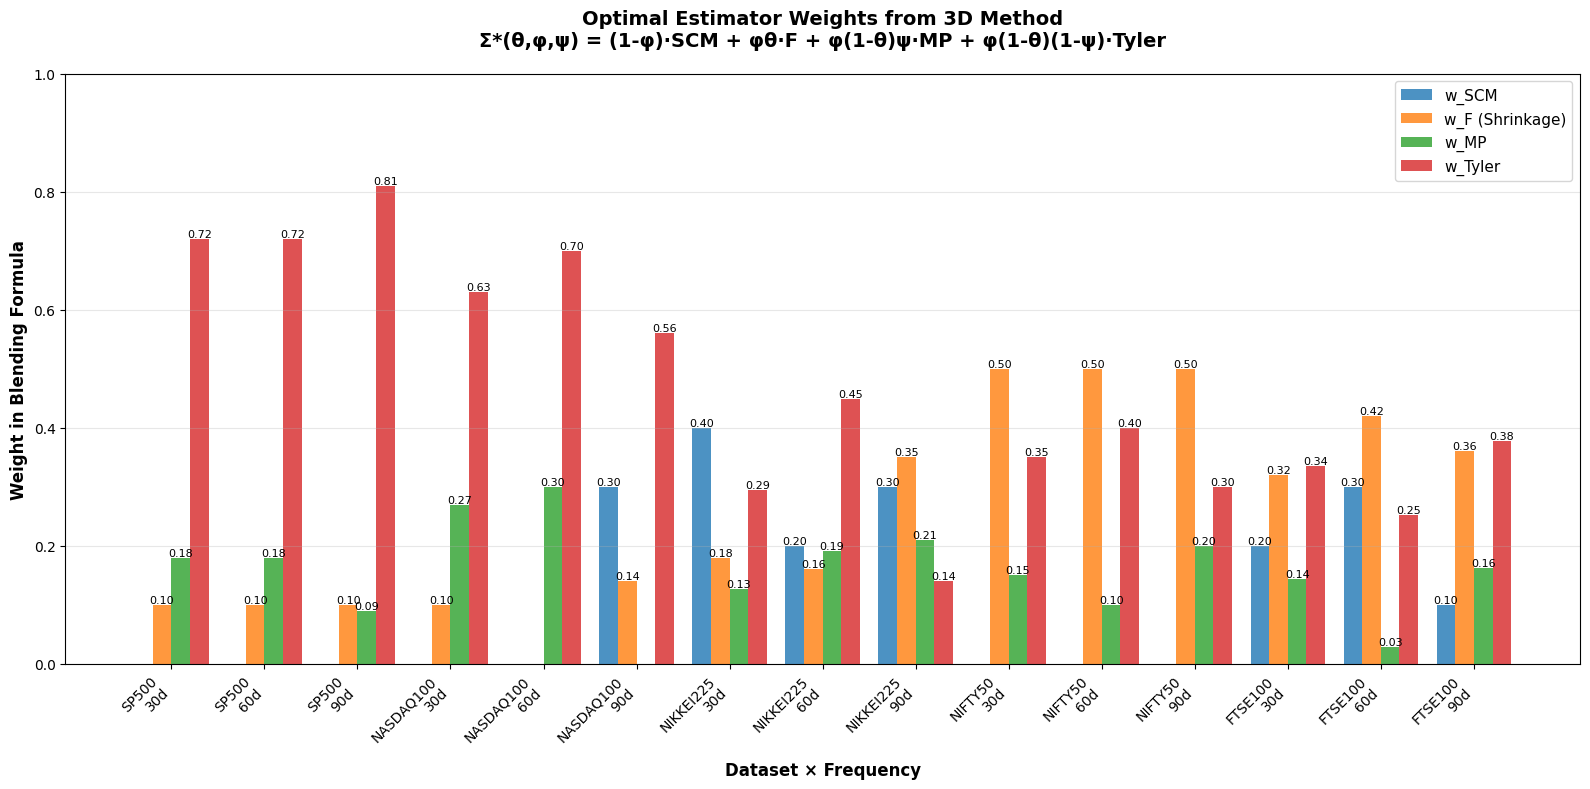


ESTIMATOR WEIGHTS TABLE
  Dataset Frequency  w_SCM  w_F  w_MP  w_Tyler   θ   φ   ψ
    SP500       30d    0.0 0.10 0.180    0.720 0.1 1.0 0.2
    SP500       60d    0.0 0.10 0.180    0.720 0.1 1.0 0.2
    SP500       90d    0.0 0.10 0.090    0.810 0.1 1.0 0.1
NASDAQ100       30d    0.0 0.10 0.270    0.630 0.1 1.0 0.3
NASDAQ100       60d    0.0 0.00 0.300    0.700 0.0 1.0 0.3
NASDAQ100       90d    0.3 0.14 0.000    0.560 0.2 0.7 0.0
NIKKEI225       30d    0.4 0.18 0.126    0.294 0.3 0.6 0.3
NIKKEI225       60d    0.2 0.16 0.192    0.448 0.2 0.8 0.3
NIKKEI225       90d    0.3 0.35 0.210    0.140 0.5 0.7 0.6
  NIFTY50       30d    0.0 0.50 0.150    0.350 0.5 1.0 0.3
  NIFTY50       60d    0.0 0.50 0.100    0.400 0.5 1.0 0.2
  NIFTY50       90d    0.0 0.50 0.200    0.300 0.5 1.0 0.4
  FTSE100       30d    0.2 0.32 0.144    0.336 0.4 0.8 0.3
  FTSE100       60d    0.3 0.42 0.028    0.252 0.6 0.7 0.1
  FTSE100       90d    0.1 0.36 0.162    0.378 0.4 0.9 0.3

Note: w_SCM + w_F + w_MP + w_T

In [9]:
def plot_estimator_weights(all_results, save_path=None):
    """
    Plot the optimal weights on each covariance estimator (SCM, F, MP, Tyler)
    from the 3D method hyperparameters.
    
    Weights derived from optimal (θ, φ, ψ):
        w_SCM = 1 - φ
        w_F = φ * θ
        w_MP = φ * (1 - θ) * ψ
        w_Tyler = φ * (1 - θ) * (1 - ψ)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    # Extract optimal parameters for each dataset/frequency
    data = []
    for (dataset, freq), results in all_results.items():
        if 'our_3d_method' in results:
            theta = results['our_3d_method'].get('theta_opt', 0)
            phi = results['our_3d_method'].get('phi_opt', 0)
            psi = results['our_3d_method'].get('psi_opt', 0)
            
            # Calculate weights
            w_SCM = 1 - phi
            w_F = phi * theta
            w_MP = phi * (1 - theta) * psi
            w_Tyler = phi * (1 - theta) * (1 - psi)
            
            data.append({
                'Dataset': dataset.upper(),
                'Frequency': f'{freq}d',
                'w_SCM': w_SCM,
                'w_F': w_F,
                'w_MP': w_MP,
                'w_Tyler': w_Tyler,
                'θ': theta,
                'φ': phi,
                'ψ': psi
            })
    
    df = pd.DataFrame(data)
    
    # Create grouped bar chart
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Group by dataset and frequency
    x = np.arange(len(df))
    width = 0.2
    
    bars1 = ax.bar(x - 1.5*width, df['w_SCM'], width, label='w_SCM', color='#1f77b4', alpha=0.8)
    bars2 = ax.bar(x - 0.5*width, df['w_F'], width, label='w_F (Shrinkage)', color='#ff7f0e', alpha=0.8)
    bars3 = ax.bar(x + 0.5*width, df['w_MP'], width, label='w_MP', color='#2ca02c', alpha=0.8)
    bars4 = ax.bar(x + 1.5*width, df['w_Tyler'], width, label='w_Tyler', color='#d62728', alpha=0.8)
    
    # Customize
    ax.set_xlabel('Dataset × Frequency', fontsize=12, fontweight='bold')
    ax.set_ylabel('Weight in Blending Formula', fontsize=12, fontweight='bold')
    ax.set_title('Optimal Estimator Weights from 3D Method\nΣ*(θ,φ,ψ) = (1-φ)·SCM + φθ·F + φ(1-θ)ψ·MP + φ(1-θ)(1-ψ)·Tyler', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{row['Dataset']}\n{row['Frequency']}" for _, row in df.iterrows()], 
                        rotation=45, ha='right')
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.0)
    
    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            if height > 0.02:  # Only label if weight > 2%
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom', fontsize=8)
    
    autolabel(bars1)
    autolabel(bars2)
    autolabel(bars3)
    autolabel(bars4)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {save_path}")
    
    plt.show()
    
    # Also print the table
    print("\n" + "="*80)
    print("ESTIMATOR WEIGHTS TABLE")
    print("="*80)
    display_df = df[['Dataset', 'Frequency', 'w_SCM', 'w_F', 'w_MP', 'w_Tyler', 'θ', 'φ', 'ψ']]
    print(display_df.to_string(index=False))
    print("\nNote: w_SCM + w_F + w_MP + w_Tyler = 1.0 for each row")
    
    # Verify sum = 1
    df['sum'] = df['w_SCM'] + df['w_F'] + df['w_MP'] + df['w_Tyler']
    print(f"\nVerification - all sums ≈ 1.0: {np.allclose(df['sum'], 1.0)}")
    
    return df



weights_df = plot_estimator_weights(all_results, save_path='estimator_weights.png')